<a href="https://colab.research.google.com/github/gvigkannan/Model_ADay/blob/Keras/Basic_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Importing and Processing Dataset!
 * Need to try out Data Augmentation and see the result!

In [ ]:
 (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
 # For Feature Space
 x_train = x_train.astype('float32')/255
 x_test = x_test.astype('float32')/255

 # For Target Space
 y_train = keras.utils.to_categorical(y_train, num_classes = 10)
 y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
#train_test_split?

In [ ]:
# Creating a validation dataset
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.1)

In [ ]:
print(y_train.shape)
print(y_val.shape)

(45000, 10)
(5000, 10)


## CNN Baseline Model
* Implemented using Functional API. (Not needed but more similar to other implementations!)

In [ ]:
from tensorflow.keras import layers

In [ ]:
def CNN_v1(classes=10):
    CNN_input = keras.Input(shape =(32,32,3), 
                            name = 'CNN_Input')
    
    x = layers.Conv2D(filters = 32,
                      kernel_size = (3,3),
                      strides = 1, 
                      padding = 'same', 
                      name = 'Conv2d_32')(CNN_input)
    x = keras.activations.elu(x,
                              name = 'ELU_32')
    x = keras.layers.Conv2D(filters = 64,
                            kernel_size = (3,3),
                            name = 'Conv2d_64')(x)
    x = keras.layers.Activation('elu',name = 'ELU_64')(x)
    x = keras.layers.MaxPool2D(pool_size= (2,2),
                               name = 'MaxPool_1')(x)
    x = keras.layers.Dropout(0.25,name = 'Dropout_Conv2D')(x)

    x = keras.layers.Flatten(name = 'Flatten')(x)
    x = keras.layers.Dense(64,name = 'Dense_128')(x)
    x = keras.layers.Activation('elu',
                                name = 'ELU_128')(x)
    x = keras.layers.Dropout(0.5,
                             name = 'Dropout_Dense')(x)
    x = keras.layers.Dense(classes,
                           name = 'Dense_10')(x)
    CNN_output = keras.layers.Activation('softmax',
                                         name = 'Softmax_10')(x)
    model = keras.Model(inputs = CNN_input, 
                        outputs = CNN_output)

    return model


In [ ]:
model_v1 = CNN_Baseline()
model_v1.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6),
                 metrics = ['accuracy'])
model_v1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_Input (InputLayer)       [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
tf.keras.activations.elu_4 ( (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2d_32_1 (Conv2D)         (None, 30, 30, 64)        18496     
_________________________________________________________________
ELU_32_1 (Activation)        (None, 30, 30, 64)        0         
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 15, 15, 64)        0         
_________________________________________________________________
Dropout_Conv2D (Dropout)     (None, 15, 15, 64)        0   

In [ ]:
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'CNN_C32_C32_D128.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_best_only = True,
                                                save_weights_only = True,
                                                verbose = 2),
                keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 7,
                                              verbose = 0,
                                              restore_best_weights = True)
                ]

In [ ]:
# Approx: 2.5 minutes per epoch! for C32, C64 and D128
# Approx: 2 min 21s per epoch! for C32, C32 and D64: 161 seconds

history = model_v1.fit(x_train, y_train, 
                       batch_size = 32,
                       epochs = 1,
                       validation_data = (x_val, y_val),
                       )

1407/1407 [==============================] - 161s 114ms/step - loss: 1.5071 - accuracy: 0.4772 - val_loss: 1.2323 - val_accuracy: 0.5686


## Variant 2 - 62.1%

In [ ]:
def CNN_v1_1(classes=10):
    CNN_input = keras.Input(shape =(32,32,3), 
                            name = 'CNN_Input')
    
    x = layers.Conv2D(filters = 32,
                      kernel_size = (3,3),
                      strides = 1, 
                      padding = 'same', 
                      name = 'Conv2d_32')(CNN_input)
    x = keras.layers.Activation('elu',
                                name = 'ELU_32')(x)
    x = keras.layers.MaxPool2D(pool_size= (2,2),
                               name = 'MaxPool_1')(x)
    x = keras.layers.Dropout(0.25,name = 'Dropout_Conv2D')(x)

    x = keras.layers.Flatten(name = 'Flatten')(x)
    x = keras.layers.Dense(64,name = 'Dense_64')(x)
    x = keras.layers.Activation('elu',
                                name = 'ELU_64')(x)
    x = keras.layers.Dropout(0.5,
                             name = 'Dropout_Dense')(x)

    x = keras.layers.Dense(classes,
                           name = 'Dense_10')(x)
    CNN_output = keras.layers.Activation('softmax',
                                         name = 'Softmax_10')(x)
    model = keras.Model(inputs = CNN_input, 
                        outputs = CNN_output)

    return model


In [ ]:
model_temp = CNN_v1_1()
model_temp.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6),
                 metrics = ['accuracy'])
model_temp.summary()
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'CNN_v1_1.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_weights_only = True,
                                                verbose = 0)]

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_Input (InputLayer)       [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
ELU_32 (Activation)          (None, 32, 32, 32)        0         
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 16, 16, 32)        0         
_________________________________________________________________
Dropout_Conv2D (Dropout)     (None, 16, 16, 32)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
Dense_64 (Dense)             (None, 64)                524

In [ ]:
# Approx: 2.5 minutes per epoch! for C32, C64 and D128
# Approx: 2 min 21s per epoch! for C32, C32 and D64: 161 seconds
# Approx: 45s per epoch for C32 D64: val accuracy: 0.47 after 1 epoch
###     

history_temp = model_temp.fit(x_train, 
                              y_train, 
                              batch_size = 32,
                              epochs = 20,
                              validation_data = (x_val, y_val),
                              callbacks = my_callbacks)

Epoch 1/20
1407/1407 [==============================] - 45s 32ms/step - loss: 1.8605 - accuracy: 0.3576 - val_loss: 1.5551 - val_accuracy: 0.4594

Epoch 00001: saving model to CNN_v2.hdf5
Epoch 2/20
1407/1407 [==============================] - 45s 32ms/step - loss: 1.4649 - accuracy: 0.4918 - val_loss: 1.3358 - val_accuracy: 0.5366

Epoch 00002: saving model to CNN_v2.hdf5
Epoch 3/20
1407/1407 [==============================] - 45s 32ms/step - loss: 1.3761 - accuracy: 0.5205 - val_loss: 1.3079 - val_accuracy: 0.5398

Epoch 00003: saving model to CNN_v2.hdf5
Epoch 4/20
1407/1407 [==============================] - 45s 32ms/step - loss: 1.3034 - accuracy: 0.5464 - val_loss: 1.2837 - val_accuracy: 0.5586

Epoch 00004: saving model to CNN_v2.hdf5
Epoch 5/20
1407/1407 [==============================] - 45s 32ms/step - loss: 1.2466 - accuracy: 0.5677 - val_loss: 1.2498 - val_accuracy: 0.5618

Epoch 00005: saving model to CNN_v2.hdf5
Epoch 6/20
1407/1407 [==============================] - 45s 

In [ ]:
# Approx: 2.5 minutes per epoch! for C32, C64 and D128
# Approx: 2 min 21s per epoch! for C32, C32 and D64: 161 seconds
# Approx: 45s per epoch for C32 D64: val accuracy: 0.47 after 1 epoch
### After 20 + 1 + 1 + 3 epochs: val_accuracy: 
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'CNN_v1_1.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_best_only = True, # Mostly Important
                                                save_weights_only = True,
                                                verbose = 2),
                keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 7, 
                                              mode = 'min'
                                              restore_best_weights = True)]

# Prefer verbose = 2. Since it tells you if the parameter monitored improved or not
# Though it might clutter the entire display, it is important to monitor this.
history_temp = model_v2.fit(x_train, 
                            y_train, 
                            batch_size = 32,
                            epochs = 3,
                            validation_data = (x_val, y_val),
                            callbacks = my_callbacks)

Epoch 1/3
1407/1407 [==============================] - 44s 32ms/step - loss: 0.9890 - accuracy: 0.6564 - val_loss: 1.1436 - val_accuracy: 0.6202

Epoch 00001: val_loss improved from inf to 1.14356, saving model to CNN_v1_1.hdf5
Epoch 2/3
1407/1407 [==============================] - 45s 32ms/step - loss: 0.9915 - accuracy: 0.6559 - val_loss: 1.1021 - val_accuracy: 0.6250

Epoch 00002: val_loss improved from 1.14356 to 1.10208, saving model to CNN_v1_1.hdf5
Epoch 3/3
1407/1407 [==============================] - 45s 32ms/step - loss: 0.9793 - accuracy: 0.6593 - val_loss: 1.1733 - val_accuracy: 0.6066

Epoch 00003: val_loss did not improve from 1.10208


In [ ]:
def plot_perf(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize = (7,7))
    plt.plot(history['accuracy'], c = 'b', label = 'train_accuracy')
    plt.plot(history['val_accuracy'], c = 'orange' , label = 'val_accuracy')
    plt.xticks(c = 'c')
    plt.yticks(c = 'c')
    plt.xlim([0, 10])
    plt.ylim([0.4, 0.7])
    plt.title('Baseline_v2')
    plt.legend()
    plt.show()

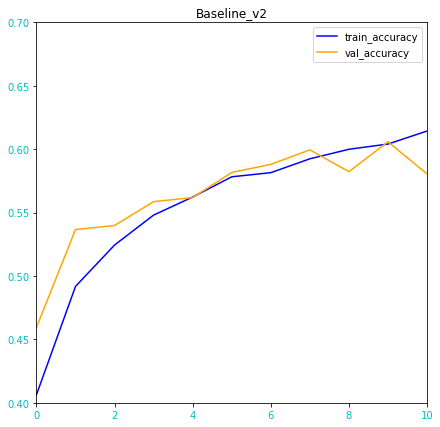

In [ ]:
plot_perf(history_v2.history)

In [ ]:
model_v2.load_weights('CNN_v1_1.hdf5')

In [ ]:
print(model_v2.evaluate(x_test, y_test)) 
print(model_v2.evaluate(x_val, y_val)) 
# test: 0.6210
# train:  0.6250 
# Precise fit.

313/313 [==============================] - 3s 9ms/step - loss: 1.1158 - accuracy: 0.6210
[1.1158320903778076, 0.6209999918937683]
157/157 [==============================] - 1s 9ms/step - loss: 1.1021 - accuracy: 0.6250
[1.102084755897522, 0.625]


## Baseline - Variant 3 - 56.23%

In [ ]:
def CNN_Baseline_BN(classes=10):
    CNN_input = keras.Input(shape =(32,32,3), 
                            name = 'CNN_Input')
    
    x = layers.Conv2D(filters = 32,
                      kernel_size = (3,3),
                      strides = 1, 
                      padding = 'same', 
                      name = 'Conv2d_32')(CNN_input)
    x = keras.layers.BatchNormalization(name = 'BN_32')(x)
    x = keras.activations.elu(x,
                              name = 'ELU_32')
    x = keras.layers.MaxPool2D(pool_size= (2,2),
                               name = 'MaxPool_1')(x)

    x = keras.layers.Flatten(name = 'Flatten')(x)
    x = keras.layers.Dense(64,name = 'Dense_64')(x)
    x = keras.layers.Activation('elu',
                                name = 'ELU_64')(x)
    x = keras.layers.Dropout(0.5,
                             name = 'Dropout_Dense')(x)
    x = keras.layers.Dense(classes,
                           name = 'Dense_10')(x)
    CNN_output = keras.layers.Activation('softmax',
                                         name = 'Softmax_10')(x)
    model = keras.Model(inputs = CNN_input, 
                        outputs = CNN_output)

    return model


In [ ]:
model_v3 = CNN_Baseline_BN()
model_v3.compile(loss = keras.losses.CategoricalCrossentropy(from_logits= True),
                 optimizer = keras.optimizers.RMSprop(lr = 0.001),
                 metrics = ['accuracy'])
# Batch Norm increases the number of parameters!
model_v3.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_Input (InputLayer)       [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
BN_32 (BatchNormalization)   (None, 32, 32, 32)        128       
_________________________________________________________________
tf.keras.activations.elu_12  (None, 32, 32, 32)        0         
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 16, 16, 32)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
Dense_64 (Dense)             (None, 64)                524

In [ ]:
# Approx: 2min 50s  per epoch with C32 BN C64 BN D128 D10
# Approx: 51s       per epoch with C32 BN D64 D10:
## val_accuracy = 0.1450 after 1 epoch
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'CNN_v3.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_best_only = True, # Mostly Important
                                                save_weights_only = True,
                                                verbose = 2),
                keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 7, 
                                              mode = 'min',
                                              restore_best_weights = True)]
history_temp = model_v3.fit(x_train, y_train, batch_size = 64,
                       epochs = 20, validation_data = (x_val, y_val),
                       callbacks = my_callbacks)

Epoch 1/20
704/704 [==============================] - 50s 70ms/step - loss: 2.7067 - accuracy: 0.2399 - val_loss: 4.1550 - val_accuracy: 0.2276

Epoch 00001: val_loss improved from inf to 4.15497, saving model to CNN_v3.hdf5
Epoch 2/20
704/704 [==============================] - 50s 71ms/step - loss: 1.5640 - accuracy: 0.4498 - val_loss: 1.7682 - val_accuracy: 0.4042

Epoch 00002: val_loss improved from 4.15497 to 1.76821, saving model to CNN_v3.hdf5
Epoch 3/20
704/704 [==============================] - 49s 70ms/step - loss: 1.3195 - accuracy: 0.5371 - val_loss: 1.9927 - val_accuracy: 0.4390

Epoch 00003: val_loss did not improve from 1.76821
Epoch 4/20
704/704 [==============================] - 50s 71ms/step - loss: 1.2133 - accuracy: 0.5719 - val_loss: 1.7311 - val_accuracy: 0.4796

Epoch 00004: val_loss improved from 1.76821 to 1.73106, saving model to CNN_v3.hdf5
Epoch 5/20
704/704 [==============================] - 50s 71ms/step - loss: 1.1464 - accuracy: 0.5974 - val_loss: 1.9621 

In [ ]:
history_v3 = model_v3.fit(x_train, y_train, batch_size = 64,
                       epochs = 5, validation_data = (x_val, y_val),
                       callbacks = my_callbacks)

Epoch 1/5
704/704 [==============================] - 49s 70ms/step - loss: 0.7817 - accuracy: 0.7240 - val_loss: 3.4108 - val_accuracy: 0.4152

Epoch 00001: val_loss did not improve from 1.27554
Epoch 2/5
704/704 [==============================] - 49s 70ms/step - loss: 0.7720 - accuracy: 0.7260 - val_loss: 1.4016 - val_accuracy: 0.5706

Epoch 00002: val_loss did not improve from 1.27554
Epoch 3/5
704/704 [==============================] - 50s 70ms/step - loss: 0.7617 - accuracy: 0.7288 - val_loss: 2.0685 - val_accuracy: 0.4828

Epoch 00003: val_loss did not improve from 1.27554
Epoch 4/5
704/704 [==============================] - 50s 70ms/step - loss: 0.7445 - accuracy: 0.7376 - val_loss: 1.7077 - val_accuracy: 0.5572

Epoch 00004: val_loss did not improve from 1.27554
Epoch 5/5
704/704 [==============================] - 49s 70ms/step - loss: 0.7365 - accuracy: 0.7390 - val_loss: 1.8963 - val_accuracy: 0.5622

Epoch 00005: val_loss did not improve from 1.27554


In [ ]:
history_v = history_temp
history_v.history.update(history_v3.history)

In [ ]:
def plot_perf(history):
    import matplotlib.pyplot as plt
    plt.subplot(211)
    plt.plot(history['accuracy'], c = 'b', label = 'train_accuracy')
    plt.plot(history['val_accuracy'], c = 'orange' , label = 'val_accuracy')
    plt.xticks(c = 'c')
    plt.yticks(c = 'c')
    plt.xlim([0, 10])
    plt.ylim([0.4, 0.7])
    plt.title('Baseline_v2')
    plt.legend()
    plt.subplot(212)
    plt.plot(history['loss'], c = 'b', label = 'train_loss')
    plt.plot(history['val_loss'], c = 'orange' , label = 'val_loss')
    plt.xticks(c = 'c')
    plt.yticks(c = 'c')
    plt.xlim([0, 10])
    plt.title('Baseline with Batch Normalization')
    plt.legend()
    

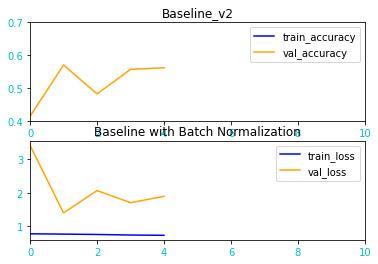

In [ ]:
plot_perf(history_v.history)

In [ ]:
print(model_v3.evaluate(x_test, y_test)) 
print(model_v3.evaluate(x_val, y_val)) 
print(model_v3.evaluate(x_train, y_train)) 
# Model definitely overfits!

313/313 [==============================] - 3s 11ms/step - loss: 2.0946 - accuracy: 0.5623
[2.09464955329895, 0.5623000264167786]
157/157 [==============================] - 2s 11ms/step - loss: 2.0880 - accuracy: 0.5666
[2.087984085083008, 0.5666000247001648]
1407/1407 [==============================] - 15s 11ms/step - loss: 1.2774 - accuracy: 0.6691
[1.277379035949707, 0.6690889000892639]


In [ ]:
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_val, y_val))
print(model.evaluate(x_test, y_test))

NameError: ignored

## Baseline - Two Conv Layers - Test Accuracy: 58.9%


In [ ]:
from tensorflow.keras import layers

In [ ]:
def IC_Layer(inputs, p = 0.5):
    x = layers.BatchNormalization()(inputs)
    x = layers.Dropout(p)(inputs)
    return x

In [ ]:
def CNN_C2(classes=10):
    CNN_input = keras.Input(shape =(32,32,3), 
                            name = 'CNN_Input')
    x = IC_Layer(CNN_input)
    x = layers.Conv2D(filters = 32,
                      kernel_size = (3,3),
                      strides = 1, 
                      padding = 'same', 
                      name = 'Conv2d_32')(CNN_input)
    x = keras.activations.elu(x,
                              name = 'ELU_32')
    x = IC_Layer(x)
    
    x = keras.layers.Conv2D(filters = 64,
                            kernel_size = (3,3),
                            name = 'Conv2d_64')(x)
    x = keras.layers.Activation('elu',name = 'ELU_64_1')(x)
    x = keras.layers.MaxPool2D(pool_size= (2,2),
                               name = 'MaxPool_1')(x)
    x = keras.layers.Dropout(0.25,name = 'Dropout_Conv2D')(x)

    x = keras.layers.Flatten(name = 'Flatten')(x)
    x = keras.layers.Dense(64,name = 'Dense_64')(x)
    x = keras.layers.Activation('elu',
                                name = 'ELU_64')(x)
    x = keras.layers.Dropout(0.5,
                             name = 'Dropout_Dense')(x)
    x = keras.layers.Dense(classes,
                           name = 'Dense_10')(x)
    CNN_output = keras.layers.Activation('softmax',
                                         name = 'Softmax_10')(x)
    model = keras.Model(inputs = CNN_input, 
                        outputs = CNN_output, 
                        name = 'CNN_C2')

    return model


In [ ]:
model_v4 = CNN_C2()
model_v4.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(),
                 metrics = ['accuracy'])
model_v4.summary()

Model: "CNN_C2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_Input (InputLayer)       [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
tf.keras.activations.elu_18  (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2d_64 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
ELU_64_1 (Activation)        (None, 30, 30, 64)        0         
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 15, 15, 64)        0    

In [ ]:
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'CNN_C5.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_best_only = True,
                                                save_weights_only = True,
                                                verbose = 2),
                keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 7,
                                              verbose = 2,
                                              restore_best_weights = True)
                ]

In [ ]:
# Approx: 2min 48s per epoch! for C32, C64 and D64 - 173s

history_temp = model_v4.fit(x_train, y_train, 
                       batch_size = 32,
                       epochs = 15,
                       validation_data = (x_val, y_val),
                       callbacks = my_callbacks
                       )

Epoch 1/15
1407/1407 [==============================] - 174s 123ms/step - loss: 1.8224 - accuracy: 0.3529 - val_loss: 1.7737 - val_accuracy: 0.4146

Epoch 00001: val_loss improved from inf to 1.77373, saving model to CNN_C5.hdf5
Epoch 2/15
1407/1407 [==============================] - 173s 123ms/step - loss: 1.3420 - accuracy: 0.5266 - val_loss: 1.5102 - val_accuracy: 0.5142

Epoch 00002: val_loss improved from 1.77373 to 1.51017, saving model to CNN_C5.hdf5
Epoch 3/15
1407/1407 [==============================] - 173s 123ms/step - loss: 1.2174 - accuracy: 0.5770 - val_loss: 1.2831 - val_accuracy: 0.5736

Epoch 00003: val_loss improved from 1.51017 to 1.28313, saving model to CNN_C5.hdf5
Epoch 4/15
1407/1407 [==============================] - 173s 123ms/step - loss: 1.1463 - accuracy: 0.5940 - val_loss: 1.2988 - val_accuracy: 0.5826

Epoch 00004: val_loss did not improve from 1.28313
Epoch 5/15
1407/1407 [==============================] - 173s 123ms/step - loss: 1.1143 - accuracy: 0.6098

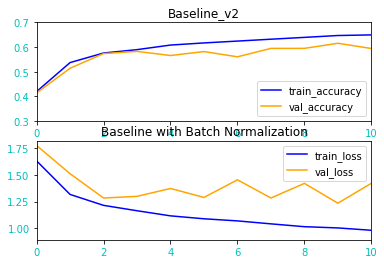

In [ ]:
plot_perf(history_temp.history)

In [ ]:
# Training for another 10 epochs!
# Approx: 2min 48s per epoch! for C32, C64 and D64 - 173s

history_tempv2 = model_v4.fit(x_train, y_train, 
                       batch_size = 32,
                       epochs = 10,
                       validation_data = (x_val, y_val),
                       callbacks = my_callbacks
                       )

Epoch 1/10
1407/1407 [==============================] - 173s 123ms/step - loss: 0.9266 - accuracy: 0.6670 - val_loss: 1.7078 - val_accuracy: 0.5744

Epoch 00001: val_loss did not improve from 1.23474
Epoch 2/10
1407/1407 [==============================] - 173s 123ms/step - loss: 0.9120 - accuracy: 0.6740 - val_loss: 1.5367 - val_accuracy: 0.5944

Epoch 00002: val_loss did not improve from 1.23474
Epoch 3/10
1407/1407 [==============================] - 173s 123ms/step - loss: 0.9009 - accuracy: 0.6783 - val_loss: 1.5968 - val_accuracy: 0.6034

Epoch 00003: val_loss did not improve from 1.23474
Epoch 4/10
1407/1407 [==============================] - 173s 123ms/step - loss: 0.8950 - accuracy: 0.6795 - val_loss: 1.6893 - val_accuracy: 0.5900

Epoch 00004: val_loss did not improve from 1.23474
Epoch 5/10
1407/1407 [==============================] - 173s 123ms/step - loss: 0.8909 - accuracy: 0.6802 - val_loss: 1.4288 - val_accuracy: 0.6160

Epoch 00005: val_loss did not improve from 1.23474


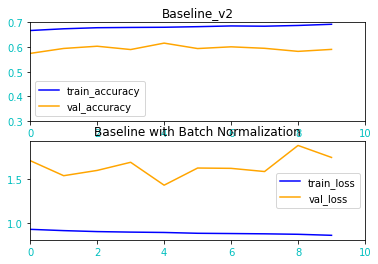

In [ ]:
plot_perf(history_tempv2.history)

I don't think the model performance would increase a lot!


In [ ]:
print(model_v4.evaluate(x_train, y_train))
print(model_v4.evaluate(x_val, y_val))
print(model_v4.evaluate(x_test, y_test))

1407/1407 [==============================] - 37s 26ms/step - loss: 1.0884 - accuracy: 0.6908
[1.0884264707565308, 0.6907555460929871]
157/157 [==============================] - 4s 25ms/step - loss: 1.7444 - accuracy: 0.5906
[1.7443667650222778, 0.5906000137329102]
313/313 [==============================] - 8s 26ms/step - loss: 1.7416 - accuracy: 0.5899
[1.7415741682052612, 0.589900016784668]


In [ ]:
model_v4.predict(x_val)

array([[7.9302734e-04, 3.6120213e-07, 1.6123256e-01, ..., 5.1609182e-01,
        7.6492826e-05, 5.7101748e-05],
       [1.5398591e-04, 1.4511992e-14, 9.9982339e-01, ..., 2.4489715e-09,
        9.6592160e-08, 4.6667704e-11],
       [6.2230754e-07, 2.6554823e-09, 1.3768608e-03, ..., 7.6361910e-05,
        9.2429325e-08, 1.2336974e-08],
       ...,
       [2.3030871e-05, 9.1526671e-09, 6.5795571e-01, ..., 8.0747023e-04,
        8.4675266e-06, 9.9379840e-06],
       [4.3883656e-06, 9.4584157e-06, 2.2239961e-04, ..., 8.2031917e-04,
        3.4121683e-08, 1.4438327e-05],
       [5.8457241e-05, 1.0821937e-02, 1.6425754e-12, ..., 1.0808789e-11,
        4.1890729e-05, 9.8907781e-01]], dtype=float32)

## Baseline - Two Conv Layers - No Dense Layers - 36.01%

*   List item
*   List item




In [ ]:
from tensorflow.keras import layers

In [ ]:
def IC_Layer(inputs, p = 0.5):
    x = layers.BatchNormalization()(inputs)
    x = layers.Dropout(p)(inputs)
    return x

In [ ]:
def CNN_C2D1(classes=10):
    CNN_input = keras.Input(shape =(32,32,3), 
                            name = 'CNN_Input')
    x = layers.BatchNormalization()(CNN_input)
    x = layers.Conv2D(filters = 32,
                      kernel_size = (3,3),
                      strides = 1, 
                      padding = 'same', 
                      name = 'Conv2d_32')(CNN_input)
    x = keras.layers.Activation('elu',
                                name = 'ELU_32')(x)
    
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = keras.layers.Conv2D(filters = 64,
                            kernel_size = (3,3),
                            name = 'Conv2d_64')(x)
    x = keras.layers.Activation('elu',
                                name = 'ELU_64_1')(x)
    x = keras.layers.MaxPool2D(pool_size= (2,2),
                               name = 'MaxPool_1')(x)
    x = keras.layers.Dropout(0.25,
                             name = 'Dropout_Conv2D')(x)

    x = keras.layers.Flatten(name = 'Flatten')(x)
    # x = keras.layers.Dense(128, 
    #                        name = 'Dense_128')(x)
    # x = keras.layers.Activation('elu',
    #                             name = 'ELU_128')(x)
    # x = keras.layers.Dropout(0.5,
                            #  name = 'Dropout_Dense')(x)
    x = keras.layers.Dense(classes,
                           name = 'Dense_10')(x)
    CNN_output = keras.layers.Activation('softmax',
                                         name = 'Softmax_10')(x)
    model = keras.Model(inputs = CNN_input, 
                        outputs = CNN_output, 
                        name = 'CNN_C32_C64_D0')

    return model


In [ ]:
model_temp = CNN_C2D1()
model_temp.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(),
                 metrics = ['accuracy'])
model_temp.summary()

Model: "CNN_C32_C64_D0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_Input (InputLayer)       [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
ELU_32 (Activation)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2d_64 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
ELU_64_1 (Activation)        (None, 30, 30, 64)     

In [ ]:
model_temp.name

'CNN_C32_C64_D0'

In [ ]:
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'CNN_C32_C64_D128.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_best_only = True,
                                                save_weights_only = True,
                                                verbose = 2),
                keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 7,
                                              verbose = 0,
                                              restore_best_weights = True)
                ]

In [ ]:
# Approx: 2min 48s per epoch! for C32, C64 and D64 - 173s
# For No Dense Layers: Time: 177s. As if the Dense layers didn't
history_temp = model_temp.fit(x_train, y_train, 
                       batch_size = 32,
                       epochs = 5,
                       validation_data = (x_val, y_val),
                       callbacks = my_callbacks
                       )

Epoch 1/5
1407/1407 [==============================] - 177s 125ms/step - loss: 2.3015 - accuracy: 0.3569 - val_loss: 2.8812 - val_accuracy: 0.2198

Epoch 00001: val_loss improved from inf to 2.88124, saving model to CNN_C32_C64_D128.hdf5
Epoch 2/5
1407/1407 [==============================] - 176s 125ms/step - loss: 1.2827 - accuracy: 0.5605 - val_loss: 1.6664 - val_accuracy: 0.4490

Epoch 00002: val_loss improved from 2.88124 to 1.66639, saving model to CNN_C32_C64_D128.hdf5
Epoch 3/5
1407/1407 [==============================] - 175s 124ms/step - loss: 1.1531 - accuracy: 0.6015 - val_loss: 1.6484 - val_accuracy: 0.4630

Epoch 00003: val_loss improved from 1.66639 to 1.64840, saving model to CNN_C32_C64_D128.hdf5
Epoch 4/5
1407/1407 [==============================] - 175s 124ms/step - loss: 1.0908 - accuracy: 0.6242 - val_loss: 1.7457 - val_accuracy: 0.4694

Epoch 00004: val_loss did not improve from 1.64840
Epoch 5/5
1407/1407 [==============================] - 175s 124ms/step - loss: 

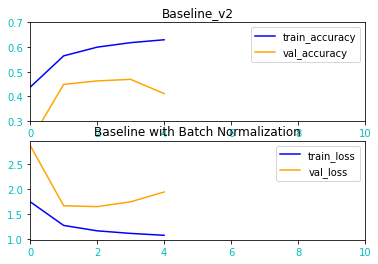

In [ ]:
plot_perf(history_temp.history)

In [ ]:
# Training for another 10 epochs!
# Approx: 2min 48s per epoch! for C32, C64 and D64 - 173s

history_tempv2 = model_temp.fit(x_train, y_train, 
                       batch_size = 32,
                       epochs = 10,
                       validation_data = (x_val, y_val),
                       callbacks = my_callbacks
                       )

Epoch 1/10
1407/1407 [==============================] - 174s 124ms/step - loss: 1.0346 - accuracy: 0.6412 - val_loss: 1.8170 - val_accuracy: 0.4342

Epoch 00001: val_loss did not improve from 1.64840
Epoch 2/10
1407/1407 [==============================] - 175s 125ms/step - loss: 1.0064 - accuracy: 0.6498 - val_loss: 2.0390 - val_accuracy: 0.4326

Epoch 00002: val_loss did not improve from 1.64840
Epoch 3/10
1407/1407 [==============================] - 176s 125ms/step - loss: 0.9822 - accuracy: 0.6600 - val_loss: 1.9940 - val_accuracy: 0.4196

Epoch 00003: val_loss did not improve from 1.64840
Epoch 4/10
1407/1407 [==============================] - 177s 125ms/step - loss: 0.9598 - accuracy: 0.6673 - val_loss: 1.8383 - val_accuracy: 0.4388

Epoch 00004: val_loss did not improve from 1.64840
Epoch 5/10
1407/1407 [==============================] - 177s 125ms/step - loss: 0.9441 - accuracy: 0.6740 - val_loss: 1.9905 - val_accuracy: 0.4442

Epoch 00005: val_loss did not improve from 1.64840


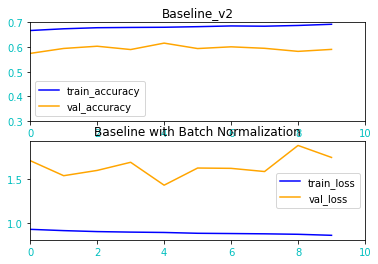

In [ ]:
plot_perf(history_tempv2.history)

I don't think the model performance would increase a lot!


In [ ]:
print(model_temp.evaluate(x_train, y_train))
print(model_temp.evaluate(x_val, y_val))
print(model_temp.evaluate(x_test, y_test))

1407/1407 [==============================] - 39s 28ms/step - loss: 2.1678 - accuracy: 0.3958
[2.1678149700164795, 0.395844429731369]
157/157 [==============================] - 4s 28ms/step - loss: 2.4523 - accuracy: 0.3688
[2.4522666931152344, 0.36880001425743103]
313/313 [==============================] - 9s 28ms/step - loss: 2.5078 - accuracy: 0.3601
[2.5078065395355225, 0.36010000109672546]


## The performance if we increase the Dense Layers!
### Not Much Improvement



## Best Model: Test Acc: 68%

In [ ]:
from tensorflow.keras import layers

In [ ]:
def CNN_C2D2_v1(classes=10):
    CNN_input = keras.Input(shape =(32,32,3), 
                            name = 'CNN_Input')
    x = layers.Conv2D(filters = 32,
                      kernel_size = (3,3),
                      strides = 1, 
                      padding = 'same', 
                      name = 'Conv2d_32')(CNN_input)
    x = layers.BatchNormalization()(x)
    x = keras.activations.elu(x,
                              name = 'ELU_32')
    
    x = keras.layers.Conv2D(filters = 32,
                            kernel_size = (3,3),
                            name = 'Conv2d_64')(x)
    x = layers.BatchNormalization()(x)                        
    x = keras.layers.Activation('elu',
                                name = 'ELU_64')(x)

    x = keras.layers.MaxPool2D(pool_size= (2,2),
                               name = 'MaxPool_1')(x)
    x = keras.layers.Dropout(0.25,
                             name = 'Dropout_Conv2D')(x) # Is this necessary?

    x = keras.layers.Flatten(name = 'Flatten')(x)
    x = keras.layers.Dense(64, name = 'Dense_64')(x)
    x = keras.layers.Activation('elu',
                                name = 'ELU_Dense64')(x)
    x = keras.layers.Dropout(0.5,
                             name = 'Dropout_64')(x)
    # x = keras.layers.Dense(16,
    #                        name = 'Dense_32')(x)
    # x = keras.layers.Dropout(0.5,
    #                          name = 'Dropout_32')(x)
    x = keras.layers.Dense(classes,
                           name = 'Dense_10')(x)

    CNN_output = keras.layers.Activation('softmax',
                                         name = 'Softmax_10')(x)
    model = keras.Model(inputs = CNN_input, 
                        outputs = CNN_output, 
                        name = 'CNN_C32_C32_D64')

    return model


In [ ]:
model_v4 = CNN_C2D2_v1()
model_v4.compile(loss = 'categorical_crossentropy',
                 optimizer = keras.optimizers.Adam(),
                 metrics = ['accuracy'])
model_v4.summary()

Model: "CNN_C32_C32_D64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN_Input (InputLayer)       [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
tf.keras.activations.elu_26  (None, 32, 32, 32)        0         
_________________________________________________________________
Conv2d_64 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
ELU_64 (Activation)          (None, 30, 30, 32)    

In [ ]:
my_callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'CNN_C2D2_v4_acc_{val_accuracy:.2f}.hdf5',
                                                monitor = 'val_loss',
                                                mode = 'min',
                                                save_best_only = True,
                                                save_weights_only = True,
                                                verbose = 2),
                keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 7,
                                              verbose = 2,
                                              restore_best_weights = True),
                keras.callbacks.ReduceLROnPlateau(factor = 0.5,
                                                  patience = 7)
                ]

In [ ]:
# Approx: 2min 48s per epoch! for C32, C64 and D64 and D16 - 141s

history_temp = model_v4.fit(x_train, y_train, 
                       batch_size = 32,
                       epochs = 10,
                       validation_data = (x_val, y_val),
                       callbacks = my_callbacks
                       )

Epoch 1/10
1407/1407 [==============================] - 141s 100ms/step - loss: 1.9665 - accuracy: 0.3161 - val_loss: 1.3674 - val_accuracy: 0.5044

Epoch 00001: val_loss improved from inf to 1.36742, saving model to CNN_C2D2_v4_acc_0.50.hdf5
Epoch 2/10
1407/1407 [==============================] - 141s 100ms/step - loss: 1.3877 - accuracy: 0.4993 - val_loss: 1.3021 - val_accuracy: 0.5388

Epoch 00002: val_loss improved from 1.36742 to 1.30211, saving model to CNN_C2D2_v4_acc_0.54.hdf5
Epoch 3/10
1407/1407 [==============================] - 140s 100ms/step - loss: 1.2083 - accuracy: 0.5743 - val_loss: 1.0244 - val_accuracy: 0.6342

Epoch 00003: val_loss improved from 1.30211 to 1.02441, saving model to CNN_C2D2_v4_acc_0.63.hdf5
Epoch 4/10
1407/1407 [==============================] - 141s 100ms/step - loss: 1.1183 - accuracy: 0.6044 - val_loss: 0.9755 - val_accuracy: 0.6470

Epoch 00004: val_loss improved from 1.02441 to 0.97548, saving model to CNN_C2D2_v4_acc_0.65.hdf5
Epoch 5/10
1407/

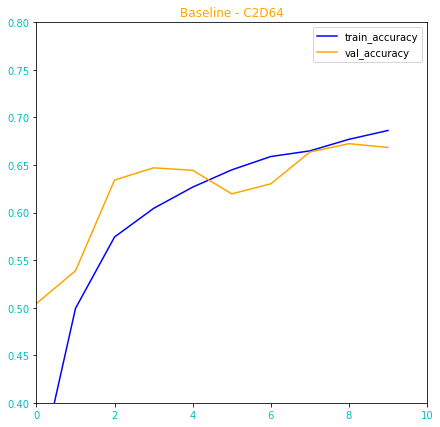

In [ ]:
history = history_temp.history
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.plot(history['accuracy'], c = 'b', label = 'train_accuracy')
plt.plot(history['val_accuracy'], c = 'orange' , label = 'val_accuracy')
plt.xticks(c = 'c')
plt.yticks(c = 'c')
plt.xlim([0, 10])
plt.ylim([0.4, 0.8])
plt.title('Baseline - C2D64', c = 'orange')
plt.legend()


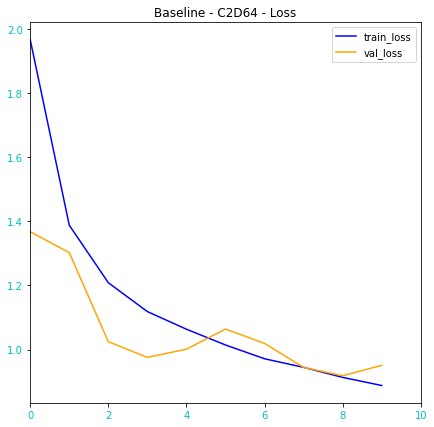

In [ ]:
plt.figure(figsize = (7,7))
plt.plot(history['loss'], c = 'b', label = 'train_loss')
plt.plot(history['val_loss'], c = 'orange' , label = 'val_loss')
plt.xticks(c = 'c')
plt.yticks(c = 'c')
plt.xlim([0, 10])
plt.title('Baseline - C2D64 - Loss')
plt.legend()


In [ ]:
print(model_v4.evaluate(x_train, y_train))
print(model_v4.evaluate(x_val, y_val))
print(model_v4.evaluate(x_test, y_test))

1407/1407 [==============================] - 31s 22ms/step - loss: 0.6271 - accuracy: 0.7827
[0.6271215677261353, 0.7827110886573792]
157/157 [==============================] - 4s 23ms/step - loss: 0.9507 - accuracy: 0.6684
[0.95071941614151, 0.66839998960495]
313/313 [==============================] - 7s 23ms/step - loss: 0.9693 - accuracy: 0.6629
[0.9693080186843872, 0.6628999710083008]


In [ ]:
# Approx: 2min 48s per epoch! for C32, C64 and D64 and D16 - 141s
# Ran it for 15 + 10: Val loss didn't improve
# For 15 more epochs! Val loss didn't improve. Need to have learning rate schedule.
history_temp_v2 = model_v4.fit(x_train, y_train, 
                       batch_size = 32,
                       epochs = 10,
                       validation_data = (x_val, y_val),
                       callbacks = my_callbacks
                       )

Epoch 1/10
 495/1407 [=========>....................] - ETA: 1:29 - loss: 0.8370 - accuracy: 0.6992

KeyboardInterrupt: ignored

In [ ]:
model_v4.save('CNN_Baseline_C2D1_v2.h5')

In [ ]:
model_temp = keras.models.load_model('CNN_Baseline_C2D1.h5')